In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income_by_month.csv')

In [3]:
df.head()

,RestaurantName,Month,Year,Total_Income,AverageIncome
0,Dravid Mansion,12,2019,1421.55,5.709036
1,Dravid Mansion,1,2020,12393.15,5.992819
2,Dravid Mansion,2,2020,12847.35,5.837051
3,Dravid Mansion,3,2020,12849.20,5.816750
4,Dravid Mansion,4,2020,12044.85,5.904338


In [4]:
df.tail()

,RestaurantName,Month,Year,Total_Income,AverageIncome
91,Tendulkar Palace,3,2022,11843.70,5.978647
92,Tendulkar Palace,4,2022,13363.30,6.099178
93,Tendulkar Palace,5,2022,12959.65,5.931190
94,Tendulkar Palace,6,2022,10881.70,5.882000
95,Tendulkar Palace,7,2022,11743.35,5.804918


In [5]:
df.shape

(96, 5)

In [6]:
df['Date'] = df['Month'].astype(str) + '/' + df['Year'].astype(str)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RestaurantName  96 non-null     object        
 1   Month           96 non-null     int64         
 2   Year            96 non-null     int64         
 3   Total_Income    96 non-null     float64       
 4   AverageIncome   96 non-null     float64       
 5   Date            96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.6+ KB


In [9]:
df.head()

,RestaurantName,Month,Year,Total_Income,AverageIncome,Date
0,Dravid Mansion,12,2019,1421.55,5.709036,2019-12-01
1,Dravid Mansion,1,2020,12393.15,5.992819,2020-01-01
2,Dravid Mansion,2,2020,12847.35,5.837051,2020-02-01
3,Dravid Mansion,3,2020,12849.20,5.816750,2020-03-01
4,Dravid Mansion,4,2020,12044.85,5.904338,2020-04-01


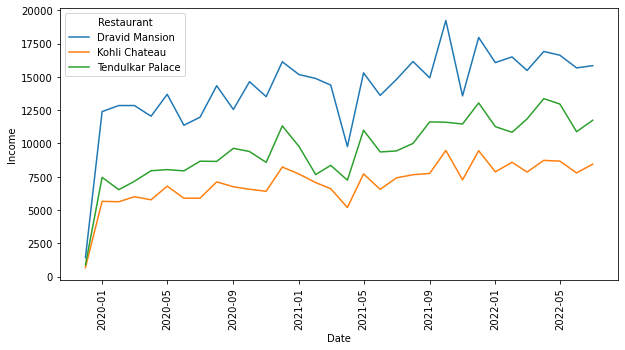

In [10]:
plt.figure(figsize=(10,5))

sns.lineplot(x='Date', y='Total_Income', hue='RestaurantName', data=df)
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.legend(title='Restaurant')

plt.show()

In [11]:
# df = pd.get_dummies(df)

In [12]:
date = df.pop('Date')
rest = df.pop('RestaurantName')

## Train/Test Split

In [13]:
train = df.loc[df['Year'] <= 2022]
test = df.loc[df['Year'] == 2022]

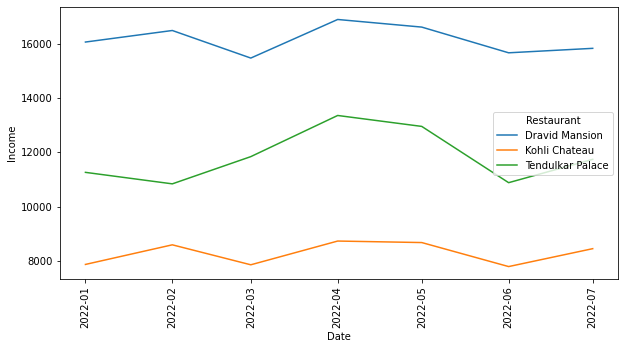

In [14]:
plt.figure(figsize=(10,5))

sns.lineplot(x=date, y='Total_Income', hue=rest, data=test)
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.legend(title='Restaurant')

plt.show()

## XGBoost Regressor Model

In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [16]:
X_train = train.drop('Total_Income', axis=1)
y_train = train['Total_Income']

X_test = test.drop('Total_Income', axis=1)
y_test = test['Total_Income']

In [17]:
df.head()

,Month,Year,Total_Income,AverageIncome
0,12,2019,1421.55,5.709036
1,1,2020,12393.15,5.992819
2,2,2020,12847.35,5.837051
3,3,2020,12849.20,5.816750
4,4,2020,12044.85,5.904338


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          96 non-null     int64  
 1   Year           96 non-null     int64  
 2   Total_Income   96 non-null     float64
 3   AverageIncome  96 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 3.1 KB


In [19]:
reg = xgb.XGBRegressor(n_estimators=1500, early_stopping_rounds=50, learning_rate=0.01)

reg.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_test, y_test)],
       verbose=True)

[0]	validation_0-rmse:10829.52994	validation_1-rmse:12429.69749
[1]	validation_0-rmse:10733.17010	validation_1-rmse:12330.15402
[2]	validation_0-rmse:10637.85990	validation_1-rmse:12231.65552
[3]	validation_0-rmse:10543.59041	validation_1-rmse:12134.19287
[4]	validation_0-rmse:10450.35115	validation_1-rmse:12037.75502
[5]	validation_0-rmse:10358.13283	validation_1-rmse:11942.33248
[6]	validation_0-rmse:10266.92628	validation_1-rmse:11847.91559
[7]	validation_0-rmse:10176.72197	validation_1-rmse:11754.49460
[8]	validation_0-rmse:10087.51118	validation_1-rmse:11662.06043
[9]	validation_0-rmse:9999.00184	validation_1-rmse:11564.06853
[10]	validation_0-rmse:9911.44708	validation_1-rmse:11467.11238
[11]	validation_0-rmse:9824.83734	validation_1-rmse:11371.18077
[12]	validation_0-rmse:9739.16427	validation_1-rmse:11276.26446
[13]	validation_0-rmse:9654.41927	validation_1-rmse:11182.35395
[14]	validation_0-rmse:9570.59404	validation_1-rmse:11089.44013
[15]	validation_0-rmse:9487.91583	validat

[130]	validation_0-rmse:4069.38036	validation_1-rmse:4726.97462
[131]	validation_0-rmse:4045.18887	validation_1-rmse:4696.68506
[132]	validation_0-rmse:4021.27798	validation_1-rmse:4666.71277
[133]	validation_0-rmse:3997.81557	validation_1-rmse:4637.08170
[134]	validation_0-rmse:3974.35958	validation_1-rmse:4608.02982
[135]	validation_0-rmse:3951.32742	validation_1-rmse:4579.53434
[136]	validation_0-rmse:3929.53975	validation_1-rmse:4549.95670
[137]	validation_0-rmse:3906.83379	validation_1-rmse:4521.68733
[138]	validation_0-rmse:3884.47518	validation_1-rmse:4493.39477
[139]	validation_0-rmse:3861.95205	validation_1-rmse:4464.69467
[140]	validation_0-rmse:3839.93516	validation_1-rmse:4435.98957
[141]	validation_0-rmse:3817.91266	validation_1-rmse:4407.83613
[142]	validation_0-rmse:3796.39102	validation_1-rmse:4379.67756
[143]	validation_0-rmse:3775.55968	validation_1-rmse:4351.84093
[144]	validation_0-rmse:3754.22501	validation_1-rmse:4324.42907
[145]	validation_0-rmse:3733.13314	valid

[259]	validation_0-rmse:2237.10763	validation_1-rmse:2199.75231
[260]	validation_0-rmse:2230.07703	validation_1-rmse:2187.64000
[261]	validation_0-rmse:2221.22254	validation_1-rmse:2174.64284
[262]	validation_0-rmse:2213.83457	validation_1-rmse:2161.54970
[263]	validation_0-rmse:2207.33236	validation_1-rmse:2148.55725
[264]	validation_0-rmse:2199.00165	validation_1-rmse:2135.66269
[265]	validation_0-rmse:2192.50903	validation_1-rmse:2122.86686
[266]	validation_0-rmse:2184.59031	validation_1-rmse:2110.16223
[267]	validation_0-rmse:2176.75506	validation_1-rmse:2097.55347
[268]	validation_0-rmse:2168.25466	validation_1-rmse:2085.03449
[269]	validation_0-rmse:2160.54191	validation_1-rmse:2072.60824
[270]	validation_0-rmse:2154.11782	validation_1-rmse:2060.27211
[271]	validation_0-rmse:2146.53442	validation_1-rmse:2048.02715
[272]	validation_0-rmse:2139.03096	validation_1-rmse:2035.87249
[273]	validation_0-rmse:2132.23134	validation_1-rmse:2023.80609
[274]	validation_0-rmse:2125.78545	valid

[388]	validation_0-rmse:1520.15901	validation_1-rmse:1164.82169
[389]	validation_0-rmse:1516.90443	validation_1-rmse:1161.80783
[390]	validation_0-rmse:1513.68402	validation_1-rmse:1158.83221
[391]	validation_0-rmse:1510.67694	validation_1-rmse:1153.66975
[392]	validation_0-rmse:1507.24185	validation_1-rmse:1150.13711
[393]	validation_0-rmse:1504.15313	validation_1-rmse:1144.60292
[394]	validation_0-rmse:1500.61974	validation_1-rmse:1141.55991
[395]	validation_0-rmse:1497.50963	validation_1-rmse:1138.72696
[396]	validation_0-rmse:1494.50976	validation_1-rmse:1133.27160
[397]	validation_0-rmse:1491.04791	validation_1-rmse:1130.31931
[398]	validation_0-rmse:1487.75060	validation_1-rmse:1126.97564
[399]	validation_0-rmse:1484.34794	validation_1-rmse:1124.12871
[400]	validation_0-rmse:1481.39768	validation_1-rmse:1118.76638
[401]	validation_0-rmse:1478.41671	validation_1-rmse:1116.09883
[402]	validation_0-rmse:1475.46128	validation_1-rmse:1110.79603
[403]	validation_0-rmse:1472.27022	valid

[518]	validation_0-rmse:1123.14886	validation_1-rmse:750.81359
[519]	validation_0-rmse:1120.72910	validation_1-rmse:748.14717
[520]	validation_0-rmse:1117.86429	validation_1-rmse:745.61384
[521]	validation_0-rmse:1116.67346	validation_1-rmse:743.39276
[522]	validation_0-rmse:1113.83833	validation_1-rmse:740.88727
[523]	validation_0-rmse:1111.62269	validation_1-rmse:738.27106
[524]	validation_0-rmse:1110.45099	validation_1-rmse:736.09114
[525]	validation_0-rmse:1107.64767	validation_1-rmse:733.61503
[526]	validation_0-rmse:1105.29468	validation_1-rmse:731.04514
[527]	validation_0-rmse:1102.39520	validation_1-rmse:728.53769
[528]	validation_0-rmse:1101.24411	validation_1-rmse:726.40135
[529]	validation_0-rmse:1098.49632	validation_1-rmse:723.95623
[530]	validation_0-rmse:1095.77662	validation_1-rmse:721.53485
[531]	validation_0-rmse:1093.62050	validation_1-rmse:719.01586
[532]	validation_0-rmse:1092.48804	validation_1-rmse:716.91994
[533]	validation_0-rmse:1089.79841	validation_1-rmse:71

[650]	validation_0-rmse:873.08979	validation_1-rmse:517.22930
[651]	validation_0-rmse:871.82676	validation_1-rmse:517.03628
[652]	validation_0-rmse:871.22634	validation_1-rmse:516.04880
[653]	validation_0-rmse:868.54612	validation_1-rmse:514.57826
[654]	validation_0-rmse:867.29342	validation_1-rmse:513.80920
[655]	validation_0-rmse:866.69906	validation_1-rmse:512.83532
[656]	validation_0-rmse:864.04252	validation_1-rmse:511.38199
[657]	validation_0-rmse:862.39580	validation_1-rmse:509.53412
[658]	validation_0-rmse:859.76820	validation_1-rmse:508.11794
[659]	validation_0-rmse:859.17814	validation_1-rmse:507.15467
[660]	validation_0-rmse:856.57481	validation_1-rmse:505.75383
[661]	validation_0-rmse:855.33623	validation_1-rmse:505.59046
[662]	validation_0-rmse:854.75198	validation_1-rmse:504.64078
[663]	validation_0-rmse:852.17154	validation_1-rmse:503.24079
[664]	validation_0-rmse:850.94328	validation_1-rmse:502.49970
[665]	validation_0-rmse:850.36480	validation_1-rmse:501.56304
[666]	va

[783]	validation_0-rmse:701.26892	validation_1-rmse:410.42732
[784]	validation_0-rmse:700.12452	validation_1-rmse:410.27547
[785]	validation_0-rmse:699.09023	validation_1-rmse:409.63486
[786]	validation_0-rmse:698.73793	validation_1-rmse:409.18425
[787]	validation_0-rmse:697.77666	validation_1-rmse:408.89219
[788]	validation_0-rmse:697.42822	validation_1-rmse:408.44824
[789]	validation_0-rmse:696.13419	validation_1-rmse:407.45490
[790]	validation_0-rmse:695.11183	validation_1-rmse:406.82262
[791]	validation_0-rmse:694.76671	validation_1-rmse:406.38427
[792]	validation_0-rmse:693.04767	validation_1-rmse:406.10421
[793]	validation_0-rmse:691.94793	validation_1-rmse:405.28459
[794]	validation_0-rmse:690.24604	validation_1-rmse:405.00809
[795]	validation_0-rmse:689.90613	validation_1-rmse:404.58009
[796]	validation_0-rmse:688.22241	validation_1-rmse:404.30947
[797]	validation_0-rmse:687.13477	validation_1-rmse:403.50278
[798]	validation_0-rmse:686.79930	validation_1-rmse:403.08263
[799]	va

[916]	validation_0-rmse:582.12773	validation_1-rmse:354.56640
[917]	validation_0-rmse:580.82073	validation_1-rmse:354.19958
[918]	validation_0-rmse:579.94299	validation_1-rmse:353.95360
[919]	validation_0-rmse:578.37953	validation_1-rmse:353.36305
[920]	validation_0-rmse:578.17218	validation_1-rmse:352.88655
[921]	validation_0-rmse:576.88475	validation_1-rmse:352.52372
[922]	validation_0-rmse:576.25591	validation_1-rmse:352.11462
[923]	validation_0-rmse:574.70419	validation_1-rmse:351.25918
[924]	validation_0-rmse:574.49836	validation_1-rmse:350.80086
[925]	validation_0-rmse:573.24254	validation_1-rmse:351.03515
[926]	validation_0-rmse:573.03853	validation_1-rmse:350.50789
[927]	validation_0-rmse:572.16606	validation_1-rmse:350.26556
[928]	validation_0-rmse:570.90925	validation_1-rmse:349.91195
[929]	validation_0-rmse:570.70706	validation_1-rmse:349.37871
[930]	validation_0-rmse:570.06340	validation_1-rmse:348.98015
[931]	validation_0-rmse:568.82855	validation_1-rmse:349.20345
[932]	va

[1048]	validation_0-rmse:475.36593	validation_1-rmse:313.36240
[1049]	validation_0-rmse:474.34703	validation_1-rmse:312.93662
[1050]	validation_0-rmse:474.18288	validation_1-rmse:312.54849
[1051]	validation_0-rmse:473.34945	validation_1-rmse:311.47617
[1052]	validation_0-rmse:473.18855	validation_1-rmse:311.09785
[1053]	validation_0-rmse:473.00023	validation_1-rmse:310.99265
[1054]	validation_0-rmse:472.40837	validation_1-rmse:310.74111
[1055]	validation_0-rmse:471.40461	validation_1-rmse:310.32221
[1056]	validation_0-rmse:471.24452	validation_1-rmse:309.94266
[1057]	validation_0-rmse:470.35931	validation_1-rmse:309.01540
[1058]	validation_0-rmse:469.77137	validation_1-rmse:308.80726
[1059]	validation_0-rmse:469.40343	validation_1-rmse:308.64212
[1060]	validation_0-rmse:468.51284	validation_1-rmse:308.52610
[1061]	validation_0-rmse:467.98461	validation_1-rmse:308.23649
[1062]	validation_0-rmse:467.62015	validation_1-rmse:308.06960
[1063]	validation_0-rmse:466.80512	validation_1-rmse:30

[1179]	validation_0-rmse:403.35286	validation_1-rmse:274.60428
[1180]	validation_0-rmse:403.23192	validation_1-rmse:274.32395
[1181]	validation_0-rmse:402.85622	validation_1-rmse:274.16819
[1182]	validation_0-rmse:402.13592	validation_1-rmse:273.93318
[1183]	validation_0-rmse:401.84071	validation_1-rmse:273.88811
[1184]	validation_0-rmse:401.12634	validation_1-rmse:273.63356
[1185]	validation_0-rmse:400.94244	validation_1-rmse:273.58771
[1186]	validation_0-rmse:400.57344	validation_1-rmse:273.43915
[1187]	validation_0-rmse:400.20824	validation_1-rmse:273.29320
[1188]	validation_0-rmse:399.48058	validation_1-rmse:272.32039
[1189]	validation_0-rmse:399.18782	validation_1-rmse:272.27798
[1190]	validation_0-rmse:397.99866	validation_1-rmse:271.85631
[1191]	validation_0-rmse:397.81853	validation_1-rmse:271.81128
[1192]	validation_0-rmse:397.45502	validation_1-rmse:271.66755
[1193]	validation_0-rmse:396.27708	validation_1-rmse:271.25238
[1194]	validation_0-rmse:396.15920	validation_1-rmse:27

[1310]	validation_0-rmse:335.21245	validation_1-rmse:231.35557
[1311]	validation_0-rmse:334.52405	validation_1-rmse:230.37664
[1312]	validation_0-rmse:333.95038	validation_1-rmse:230.40713
[1313]	validation_0-rmse:333.14759	validation_1-rmse:229.24696
[1314]	validation_0-rmse:332.35324	validation_1-rmse:228.09292
[1315]	validation_0-rmse:331.56703	validation_1-rmse:226.94500
[1316]	validation_0-rmse:330.88784	validation_1-rmse:225.98631
[1317]	validation_0-rmse:330.32740	validation_1-rmse:226.01893
[1318]	validation_0-rmse:329.55283	validation_1-rmse:224.88216
[1319]	validation_0-rmse:328.78623	validation_1-rmse:223.75139
[1320]	validation_0-rmse:328.49530	validation_1-rmse:223.66612
[1321]	validation_0-rmse:327.73608	validation_1-rmse:222.54177
[1322]	validation_0-rmse:327.06666	validation_1-rmse:221.60212
[1323]	validation_0-rmse:326.31785	validation_1-rmse:221.69125
[1324]	validation_0-rmse:325.56928	validation_1-rmse:220.57736
[1325]	validation_0-rmse:324.82846	validation_1-rmse:21

[1441]	validation_0-rmse:267.42009	validation_1-rmse:189.95690
[1442]	validation_0-rmse:266.89930	validation_1-rmse:189.92410
[1443]	validation_0-rmse:266.61976	validation_1-rmse:189.88178
[1444]	validation_0-rmse:266.09762	validation_1-rmse:189.15496
[1445]	validation_0-rmse:265.97243	validation_1-rmse:189.12111
[1446]	validation_0-rmse:265.75492	validation_1-rmse:189.07308
[1447]	validation_0-rmse:265.63092	validation_1-rmse:189.03991
[1448]	validation_0-rmse:265.09738	validation_1-rmse:188.39361
[1449]	validation_0-rmse:264.88140	validation_1-rmse:188.34644
[1450]	validation_0-rmse:264.75843	validation_1-rmse:188.31399
[1451]	validation_0-rmse:264.24473	validation_1-rmse:188.28192
[1452]	validation_0-rmse:264.03542	validation_1-rmse:188.23685
[1453]	validation_0-rmse:263.53531	validation_1-rmse:188.19425
[1454]	validation_0-rmse:263.03078	validation_1-rmse:187.54956
[1455]	validation_0-rmse:262.52546	validation_1-rmse:187.46970
[1456]	validation_0-rmse:262.40257	validation_1-rmse:18

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

## Forecast on Test

In [20]:
test['Prediction'] = reg.predict(X_test)

<ipython-input-20-8869aa110aec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = reg.predict(X_test)


In [21]:
df_pred = df.merge(test[['Prediction']], how='left', left_index=True, right_index=True)

In [22]:
df_pred.head()

,Month,Year,Total_Income,AverageIncome,Prediction
0,12,2019,1421.55,5.709036,NaN
1,1,2020,12393.15,5.992819,NaN
2,2,2020,12847.35,5.837051,NaN
3,3,2020,12849.20,5.816750,NaN
4,4,2020,12044.85,5.904338,NaN


In [23]:
df_pred.tail()

,Month,Year,Total_Income,AverageIncome,Prediction
91,3,2022,11843.70,5.978647,11814.270508
92,4,2022,13363.30,6.099178,13359.230469
93,5,2022,12959.65,5.931190,12967.433594
94,6,2022,10881.70,5.882000,10870.368164
95,7,2022,11743.35,5.804918,11420.070312


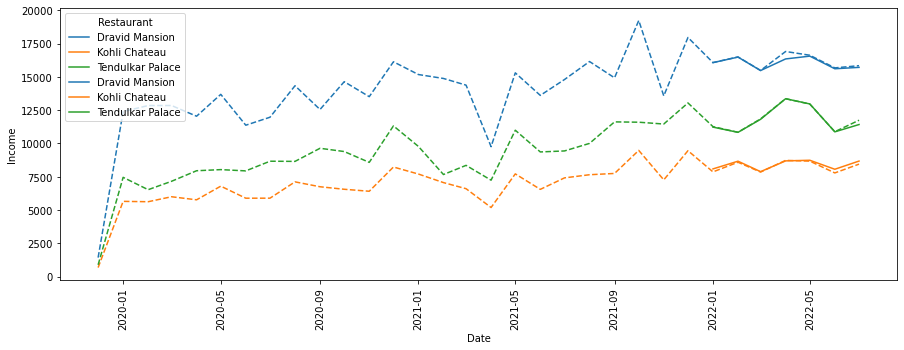

In [24]:
plt.figure(figsize=(15,5))

sns.lineplot(x=date, y='Total_Income', hue=rest, data=df_pred, ls='--') # Actual number
sns.lineplot(x=date, y='Prediction', hue=rest, data=df_pred) # Prediction number

plt.ylabel('Income')
plt.xticks(rotation=90)
plt.legend(title='Restaurant')

plt.show()

In [25]:
df_pred[df_pred['Year']==2022] # Total income prediction compared to actual income(Total_Income)

,Month,Year,Total_Income,AverageIncome,Prediction
25,1,2022,16075.30,5.809649,16071.722656
26,2,2022,16501.60,5.664813,16487.642578
27,3,2022,15483.55,5.620163,15476.642578
28,4,2022,16908.50,5.834541,16349.270508
29,5,2022,16627.30,5.741471,16560.171875
30,6,2022,15677.90,5.785203,15611.125000
31,7,2022,15842.75,5.989698,15716.778320
57,1,2022,7862.60,5.828466,8085.854492
58,2,2022,8586.70,5.913705,8666.089844
59,3,2022,7849.15,5.527570,7879.843262
